# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Econ\ 484/auxiliaries

from preamble import *
# plt.rcParams['image.cmap'] = "gray"
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Econ 484/auxiliaries


In [ ]:
# Import the packages and libraries you will use here
from pandas.plotting import scatter_matrix
import seaborn
from matplotlib import pyplot as plt

### 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use `head` and `tail` to show the first 10 and last 10 observations of the data,the default is five so you will need to add an argument for the number of rows. 

In [ ]:
import pandas as pd
%cd /content/drive/MyDrive/Econ\ 484

df = pd.read_csv('College.csv')
#df.head(10)
df.tail(10)

/content/drive/MyDrive/Econ 484


Unnamed: 0 Private   Apps  Accept  ...  S.F.Ratio  \
767              Winthrop University      No   2320    1805  ...       12.8   
768       Wisconsin Lutheran College     Yes    152     128  ...        8.5   
769            Wittenberg University     Yes   1979    1739  ...       12.8   
770                  Wofford College     Yes   1501     935  ...       15.3   
771  Worcester Polytechnic Institute     Yes   2768    2314  ...       15.2   
772          Worcester State College      No   2197    1515  ...       21.0   
773                Xavier University     Yes   1959    1805  ...       13.3   
774   Xavier University of Louisiana     Yes   2097    1915  ...       14.4   
775                  Yale University     Yes  10705    2453  ...        5.8   
776     York College of Pennsylvania     Yes   2989    1855  ...       18.1   

     perc.alumni  Expend  Grad.Rate  
767           26    6729         59  
768           26    8960         50  
769           29   10414         78  
770           42    7875         75  
771           34   10774         82  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[10 rows x 19 columns]

### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index used when the dataframe is displayed. 

In [ ]:
college = pd.read_csv('College.csv', index_col=0)
college.head(10)

Private  Apps  Accept  Enroll  ...  S.F.Ratio  \
Abilene Christian University     Yes  1660    1232     721  ...       18.1   
Adelphi University               Yes  2186    1924     512  ...       12.2   
Adrian College                   Yes  1428    1097     336  ...       12.9   
Agnes Scott College              Yes   417     349     137  ...        7.7   
Alaska Pacific University        Yes   193     146      55  ...       11.9   
Albertson College                Yes   587     479     158  ...        9.4   
Albertus Magnus College          Yes   353     340     103  ...       11.5   
Albion College                   Yes  1899    1720     489  ...       13.7   
Albright College                 Yes  1038     839     227  ...       11.3   
Alderson-Broaddus College        Yes   582     498     172  ...       11.5   

                              perc.alumni  Expend  Grad.Rate  
Abilene Christian University           12    7041         60  
Adelphi University                     16   10527         56  
Adrian College                         30    8735         54  
Agnes Scott College                    37   19016         59  
Alaska Pacific University               2   10922         15  
Albertson College                      11    9727         55  
Albertus Magnus College                26    8861         63  
Albion College                         37   11487         73  
Albright College                       23   11644         80  
Alderson-Broaddus College              15    8991         52  

[10 rows x 18 columns]

### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [ ]:
college.describe()


Apps    Accept   Enroll  Top10perc  ...  S.F.Ratio  perc.alumni  \
count    777.00    777.00   777.00     777.00  ...     777.00       777.00   
mean    3001.64   2018.80   779.97      27.56  ...      14.09        22.74   
std     3870.20   2451.11   929.18      17.64  ...       3.96        12.39   
min       81.00     72.00    35.00       1.00  ...       2.50         0.00   
25%      776.00    604.00   242.00      15.00  ...      11.50        13.00   
50%     1558.00   1110.00   434.00      23.00  ...      13.60        21.00   
75%     3624.00   2424.00   902.00      35.00  ...      16.50        31.00   
max    48094.00  26330.00  6392.00      96.00  ...      39.80        64.00   

         Expend  Grad.Rate  
count    777.00     777.00  
mean    9660.17      65.46  
std     5221.77      17.18  
min     3186.00      10.00  
25%     6751.00      53.00  
50%     8377.00      65.00  
75%    10830.00      78.00  
max    56233.00     118.00  

[8 rows x 17 columns]

$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Adjust the figsize argument make the displayed plots more readable and understandable.

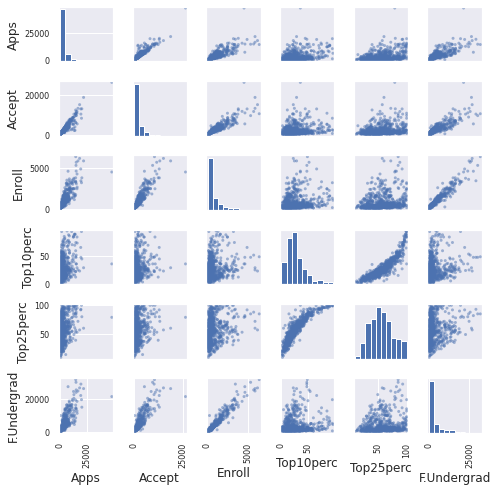

In [ ]:
scatter_matrix(df.iloc[:, 1:8], figsize=(7,7))
# call the function above these lines
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{iii)}$ Use seaborn's or matplotlib's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

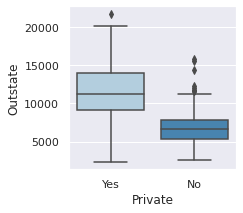

In [ ]:
import seaborn as sns

sns.boxplot(x='Private',y='Outstate',data=df, palette='Blues')


$\mathbf{iv)}$  Create a new qualitative variable in the dataframe, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the number of students coming from the top 10% of their high school classes exceeds 50.

In [ ]:
elite = []
for i in df.Top10perc:
  if i > 50:
    elite.append('Yes')
  else:
    elite.append('No')
df["Elite"] = elite
df.head()

Unnamed: 0 Private  Apps  Accept  ...  perc.alumni  \
0  Abilene Christian University     Yes  1660    1232  ...           12   
1            Adelphi University     Yes  2186    1924  ...           16   
2                Adrian College     Yes  1428    1097  ...           30   
3           Agnes Scott College     Yes   417     349  ...           37   
4     Alaska Pacific University     Yes   193     146  ...            2   

   Expend  Grad.Rate  Elite  
0    7041         60     No  
1   10527         56     No  
2    8735         54     No  
3   19016         59    Yes  
4   10922         15     No  

[5 rows x 20 columns]

Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate on Elite.

Elite
No     699
Yes     78
dtype: int64

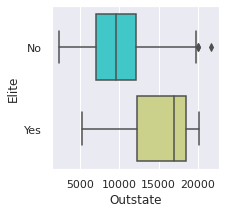

In [ ]:
# count occurrences a particular column
occur = df.groupby(['Elite']).size()
 
# display occurrences of a particular column
display(occur)
sns.set(rc={'figure.figsize':(3,3)})

sns.boxplot(x='Outstate',y='Elite',data=df, palette='rainbow')

$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a quantitative variable of your choice. You can make multiple cells or if you are familiar with python try making a grid of multiple plots to be displayed by one cell.

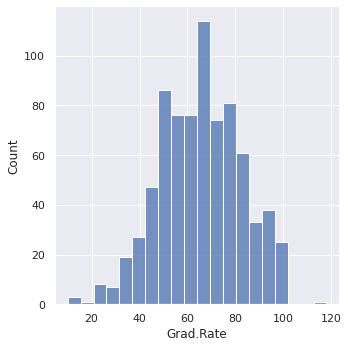

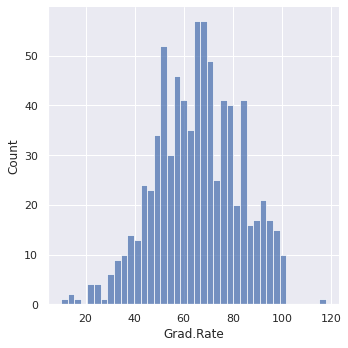

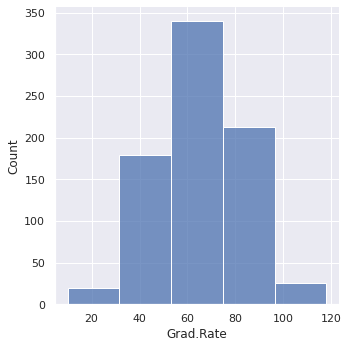

In [ ]:
G1 = df['Grad.Rate']
sns.displot(G1)
plt.show()
sns.displot(G1, bins=40)
plt.show()
sns.displot(G1, bins=5)
plt.show()

You can create a grid of histograms with the hist method of the dataframe. Choose some variables that seem interesting and create hhistograms in this way.

Text(0.5, 0, 'Graduation rate')

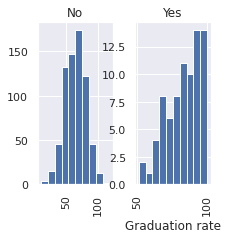

In [ ]:
df.hist(column='Grad.Rate', by='Elite')
plt.xlabel('Graduation rate')


Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.  
We are not looking for anything in particular just try to make something that shows something about the data ond its relationships in graphs or summary statistics that you haven't already created above.

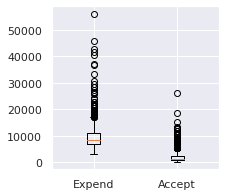

In [ ]:
Expend = df['Expend']
Accept = df['Accept']
Expend_Accept = [Expend, Accept]
plt.boxplot(Expend_Accept)
plt.xticks([1, 2], ["Expend", "Accept"])
plt.show()

# Explain what you did and what it means here
# I made a boxplot to see visually how much people spend on college and how many people are accepted to college because I think those are interesting variables.

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

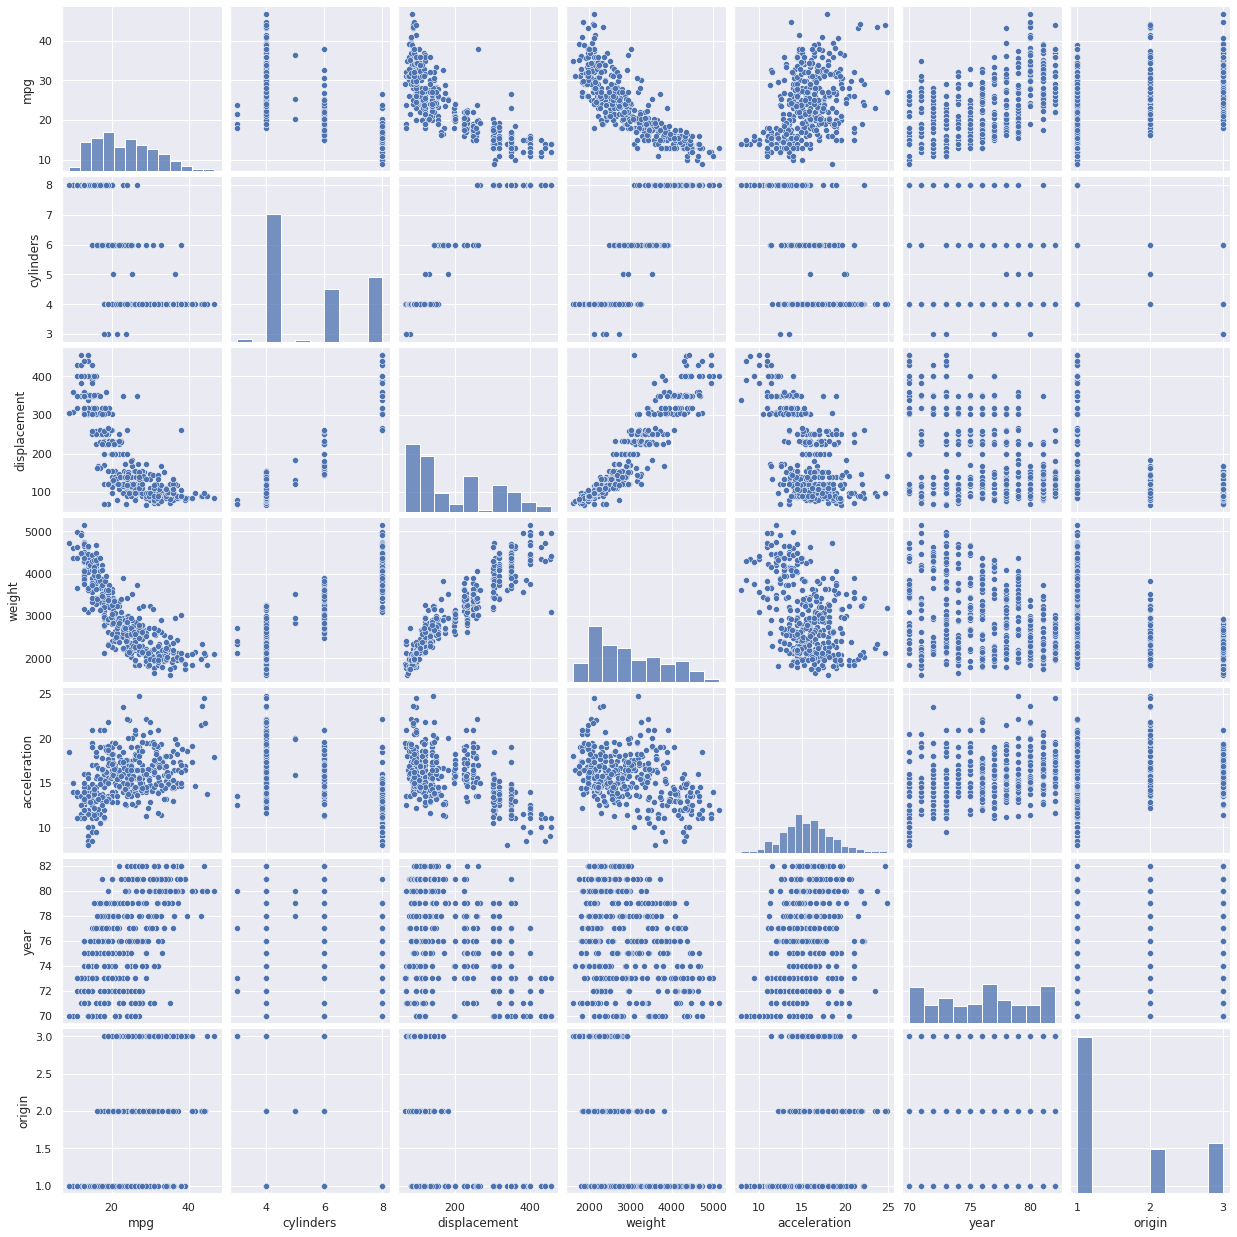

In [ ]:
df = pd.read_csv('Auto.csv')
df.head()
sns.pairplot(df)

$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

In [ ]:
df.corr()

mpg  cylinders  displacement  weight  acceleration  year  \
mpg           1.00      -0.78         -0.80   -0.83          0.42  0.58   
cylinders    -0.78       1.00          0.95    0.90         -0.50 -0.35   
displacement -0.80       0.95          1.00    0.93         -0.54 -0.37   
weight       -0.83       0.90          0.93    1.00         -0.42 -0.31   
acceleration  0.42      -0.50         -0.54   -0.42          1.00  0.28   
year          0.58      -0.35         -0.37   -0.31          0.28  1.00   
origin        0.56      -0.56         -0.61   -0.58          0.21  0.18   

              origin  
mpg             0.56  
cylinders      -0.56  
displacement   -0.61  
weight         -0.58  
acceleration    0.21  
year            0.18  
origin          1.00

$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature (a variable in the regression). Use the summary() method to print the results. 

In [ ]:
# fill in the variable names you plan on using in the regression
import statsmodels.api as sm

X = df.loc[:,['year','cylinders','acceleration']]
y = df['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              4350.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                   1.54e-301
Time:                        00:16:46   Log-Likelihood:                         -1137.0
No. Observations:                 397   AIC:                                      2280.
Df Residuals:                     394   BIC:                                      2292.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?

In [ ]:
df = df[df.horsepower != '?']
df.horsepower = df.horsepower.astype('int32')
X = df.loc[:,['year','cylinders','acceleration', 'displacement', 'weight', 'origin', 'horsepower']]
y = df['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

# i. There is a relationship between the predictors and the response: most notably, a unit increase in origin affects the mpg more positively than a unit increase in any other variable.
# ii. Year, cylinders, displacement, weight, and origin
# iii. It suggests that each year upgrades the mpg of cars by about half a point on average.

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        00:16:46   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

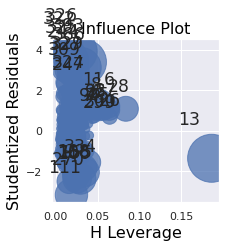

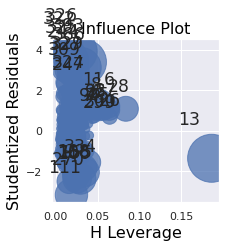

In [ ]:
sm.graphics.influence_plot(results, figsize = (300,300))
# There is a wild outlier for number 13, but the rest seem somewhat correlated vertically.

In [ ]:
weightsq = df["weight"]**2
df['weightsqu'] = weightsq
mpgcyl = df['cylinders']*df['mpg']
df['mpgcyl'] = mpgcyl

df.head()

X = df.loc[:,['year','cylinders','acceleration', 'displacement', 'weight', 'origin', 'horsepower', 'weightsqu', 'mpgcyl']]
y = df['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

# Both new variables created are very statistically significant but have next to no economic significance because they're so tiny.


                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.263e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        00:16:48   Log-Likelihood:                         -696.96
No. Observations:                 392   AIC:                                      1412.
Df Residuals:                     383   BIC:                                      1448.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
A relativley easy way to do this si the use scikit-learn's polynomial features but you can add in interaction and squared columns individually to the dataframe by multiplying columns together.

## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demeaning the values or not so there shouldn't be a big difference in results from either method.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import linear_model
SEED = 123
X, y = make_blobs(n_samples=1000, n_features=5000, cluster_std=90., random_state=SEED)

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X,y)
lm.coef_

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x_scaled.shape

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

print("PCA components:\n{}".format(pca.components_))
x_pca
model = lm.fit(x_pca,y)
model.coef_

Original shape: (1000, 5000)
Reduced shape: (1000, 2)
PCA components:
[[-0.006  0.    -0.001 ...  0.012 -0.011 -0.008]
 [ 0.002  0.015  0.013 ...  0.009 -0.006 -0.015]]


array([0.038, 0.193])

Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays mroe nicely with seaborn.

Reduced shape: (1000, 2)


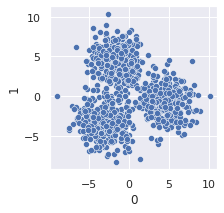

In [ ]:
pcadataframe = pd.DataFrame(x_pca)
pcadataframe.head()


sns.scatterplot(x=0,y=1,data=pcadataframe, palette='y')

## KMeans

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classifcation report function from skelarn to get some metrics that measure the quality of the model you used.

Text(0, 0.5, 'Feature 1')

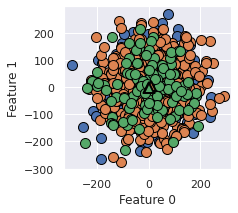

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Perform K-means clustering with K = 2. Describe your results.

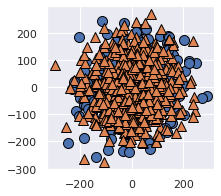

In [ ]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments)

Now perform K-means clustering with K = 4, and describe your results.

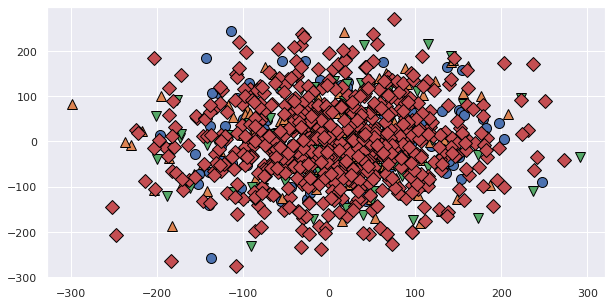

In [ ]:
axes = plt.subplots(figsize=(10, 5))

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

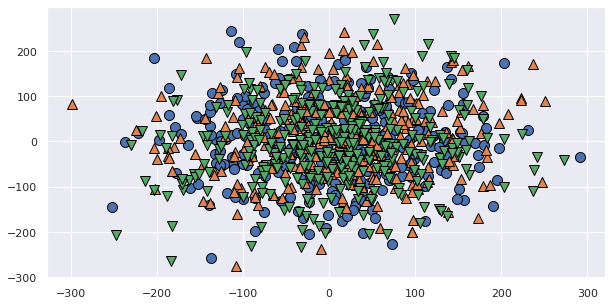

In [ ]:
axes = plt.subplots(figsize=(10, 5))

kmeans = KMeans(n_clusters=3)
kmeans.fit(pcadataframe)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

Text(0, 0.5, 'Feature 1')

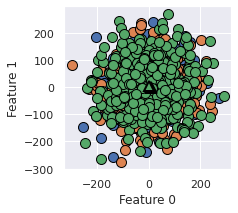

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x_scaled.shape

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#It ends up being quite similar.

## Supervised Machine Learning
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. you should be able to use the same dataframe for the previous problem using the auto dataset here as well or you can load it in and start over if you want to practice

In [ ]:
auto = pd.read_csv('Auto.csv')
auto = auto[auto.horsepower != '?']
auto.horsepower = auto.horsepower.astype('int32')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all. You will be asked to use models we have not deeply discussed in lecture but that will not change the coding aspect of it so you should be able to complete the assignment without knowing what exactly is happening. This is just meant to introduce you to how to use models from scikit-learn so don't worry if this is the case. This is one of the problems with the way a lot of people try to use machine learning so I do not recommend it in the future as predictions from a model you don't understand are probably not very good predictions no matter how good the scoring metrics do. 

In [ ]:
# this creates a variable named mpg01 that indicates whetehr or not gas mileage iss above the median of the sample
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()
auto.head(10)

mpg  cylinders  displacement  horsepower  ...  year  origin  \
0  18.0          8         307.0         130  ...    70       1   
1  15.0          8         350.0         165  ...    70       1   
2  18.0          8         318.0         150  ...    70       1   
3  16.0          8         304.0         150  ...    70       1   
4  17.0          8         302.0         140  ...    70       1   
5  15.0          8         429.0         198  ...    70       1   
6  14.0          8         454.0         220  ...    70       1   
7  14.0          8         440.0         215  ...    70       1   
8  14.0          8         455.0         225  ...    70       1   
9  15.0          8         390.0         190  ...    70       1   

                        name  mpg01  
0  chevrolet chevelle malibu  False  
1          buick skylark 320  False  
2         plymouth satellite  False  
3              amc rebel sst  False  
4                ford torino  False  
5           ford galaxie 500  False  
6           chevrolet impala  False  
7          plymouth fury iii  False  
8           pontiac catalina  False  
9         amc ambassador dpl  False  

[10 rows x 10 columns]

Scikit-learn is set up so that if you know how to use one model you know how to use them all. Here is an example of the steps that you will follow in general for classification, like in the following question. A regression problem is with a continuous outcome and classification is with a discrete outcome.
```python
from sklearn.submoodule import Model # import a model from the appropriate submodule of scikit-learn
model_obj = Model() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
```

$(a)$ Create an X matrix and a Y vector. The variable you created called `mpg01` will be the y variable.  
Are there any variables that should not be included? Hint: I am aking this because there is a variable that should not be included.

In [ ]:
y = auto['mpg01']

X = auto
X.drop(['mpg', 'name', 'mpg01'], 1, inplace=True)
# We drop mpg because it is multicollinear with mpg01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


$(b)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_obj = LinearDiscriminantAnalysis() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
# It is fairly accurate.

0.9107142857142857

$(c)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_obj = QuadraticDiscriminantAnalysis() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
# It is fairly accurate.

0.9158163265306123

$(d)$ Perform logistic regression on the training data in order to predict `mpg01`. How accurate is the model?

In [ ]:
from sklearn.linear_model import LogisticRegression
model_obj = LogisticRegression() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
# It is fairly accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9030612244897959

$(e)$ Perform K-nearest Neighbors on the training data in order to predict `mpg01`. How accurate is the model?  
Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_obj = KNeighborsClassifier() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
# It is less accurate than the others.

0.768

$(f)$ Now run a random forest classifier on the data. If you are feeling comfortable with this, you can try different parameters to try and tune the model to give better results. This is not necessary to receive full credit.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
model_obj = RandomForestClassifier() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
# This gives a perfect score

1.0